<a href="https://colab.research.google.com/github/ToshikiShimizu/PyTorch/blob/master/intro_dev/chapter3/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [0]:
import torch
from torch import nn

net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
    
)

In [0]:
from torch import optim
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
Y = digits.target

X = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y,dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())

losses = []

for epoc in range(500):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  

In [0]:
from torch.utils.data import TensorDataset, DataLoader

In [0]:
ds = TensorDataset(X,Y)
loader = DataLoader(ds, batch_size=64,shuffle=True)
net = nn.Sequential(
  nn.Linear(64,32),
  nn.ReLU(),
  nn.Linear(32,16),
  nn.ReLU(),
  nn.Linear(16,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

losses = []
for epoch in range(10):
  running_loss = 0.0
  for xx, yy in loader:
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  losses.append(running_loss)

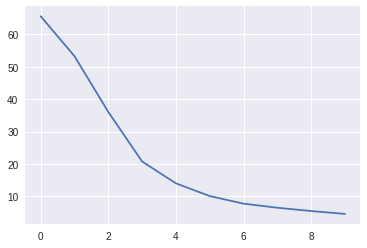

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [0]:
from sklearn.model_selection import train_test_split
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train,dtype = torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test,dtype = torch.int64)


In [0]:
k = 100
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size=32,shuffle=True)

In [0]:
train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  for i, (xx,yy) in enumerate(loader):
    y_pred = net(xx)
    loss = loss_fn(y_pred,yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/i)
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)
  test_losses.append(test_loss.item())

In [0]:
k = 100
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),  
    nn.Dropout(0.5),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size=32,shuffle=True)

In [0]:
k = 100
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),  
    nn.BatchNorm1d(k),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size=32,shuffle=True)

In [0]:
train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  net.train()
  for i, (xx,yy) in enumerate(loader):  
    y_pred = net(xx)
    loss = loss_fn(y_pred,yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/i)
  net.eval()
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)
  test_losses.append(test_loss.item())

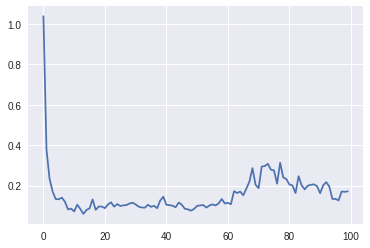

In [31]:
plt.plot(test_losses)

In [0]:
class CustomLinear(nn.Module):
  def __init__(self, in_features, out_features, bias = True, p=0.5):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features, bias)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(p)
    
  def forward(self,x):
    x = self.linear(x)
    x = self.relu(x)
    x = self.drop(x)
    return x
  
mlp = nn.Sequential(
CustomLinear(64,200),
CustomLinear(200,200),
CustomLinear(200,200),
nn.Linear(200,10)
)

In [0]:
k = 100
net = mlp
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size=32,shuffle=True)
train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  net.train()
  for i, (xx,yy) in enumerate(loader):  
    y_pred = net(xx)
    loss = loss_fn(y_pred,yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/i)
  net.eval()
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)
  test_losses.append(test_loss.item())

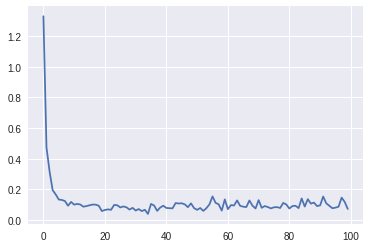

In [38]:
plt.plot(test_losses)

In [0]:
class MyMLP(nn.Module):
  def __init__(self,in_features, out_features):
    super().__init__()
    self.ln1 = CustomLinear(in_features,200)
    self.ln2 = CustomLinear(200,200)
    self.ln3 = CustomLinear(200,200)
    self.ln4 = CustomLinear(200,out_features)
  def forward(self,x):
    x = self.ln1(x)
    x = self.ln2(x)
    x = self.ln3(x)
    x = self.ln4(x)
    return x
mlp = MyMLP(64,10)

In [0]:
k = 100
net = mlp
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size=32,shuffle=True)
train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  net.train()
  for i, (xx,yy) in enumerate(loader):  
    y_pred = net(xx)
    loss = loss_fn(y_pred,yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/i)
  net.eval()
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)
  test_losses.append(test_loss.item())

In [0]:
plt.plot(test_losses)